# Bitcoin Price Analysis using Reddit


In [50]:
#Import required lib
import requests
import configparser
import pandas as pd
from datetime import timezone
import datetime

## Scope the Project and Gather Data

### Scope

This project aims to find if "subreddit" `r/bitcoin` can be used to predit the bitcoin price trend.

### Data

We will be using the Reddit API to extract the `hot` posts, as well as the comments of those posts.

In [2]:
# Used configuration file to store sensitive information
config = configparser.ConfigParser()
config.read('cred.cfg')

['cred.cfg']

In [3]:
CLIENT_ID = config.items('AUTH')[0][1]
SECRET_KEY = config.items('AUTH')[1][1]

In [4]:
auth = requests.auth.HTTPBasicAuth(CLIENT_ID,SECRET_KEY)

In [5]:
pw = config.items('USER')[0][1]

In [6]:
data = {
    'grant_type': 'password',
    'username' : 'saikirancvn',
    'password' : pw
}

In [7]:
# Describe own headers, Any name and version
headers = {'User-Agent': 'crypto_trails/0.0.1'}

In [8]:
res = requests.post('https://www.reddit.com/api/v1/access_token',
                   auth=auth,
                   data=data,
                   headers=headers)

In [9]:
TOKEN = res.json()['access_token']

In [10]:
headers['Authorization'] = f'bearer {TOKEN}'

In [11]:
requests.get('https://oauth.reddit.com/api/v1/me',headers=headers) #200- Success

<Response [200]>

### Posts Table

This is the information that is extracted from the `hot` category posts. It has the following rows,
* user_id - It's the `author_fullname` given by reddit.
* subreddit - Which subreddit the post belongs to.
* title - title of the post.
* text - The body of the post.
* upvote_ratio - Ratio of Up votes to Down votes.
* ups - No. of Up votes.
* downs - No. of Down votes.
* score - score of the post as given by reddit.
* id - id of the post.

In [12]:
df = pd.DataFrame()

In [13]:
subreddit = 'bitcoin'
listing = 'hot' # Can be 'hot','new','best',etc

In [14]:
url = f'https://oauth.reddit.com/r/{subreddit}/{listing}'

In [15]:
res = requests.get(url,
                  headers=headers,
                  params={'limit':'100'
                          #,'before':'t3_o8bjr0'
                         })# Max is 100 posts, 'before' to get more posts 

In [16]:
res.json()

{'kind': 'Listing',
 'data': {'modhash': None,
  'dist': 101,
  'children': [{'kind': 't3',
    'data': {'approved_at_utc': None,
     'subreddit': 'Bitcoin',
     'selftext': "Please utilize this sticky thread for all general **Bitcoin** discussions! If you see posts on the front page or /r/Bitcoin/new which are better suited for this daily discussion thread, please help out by directing the OP to this thread instead. Thank you!\r\n\r\nIf you don't get an answer to your question, you can try phrasing it differently or commenting again tomorrow.\r\n\r\n[Join us in the r/Bitcoin Chatroom!](https://discord.gg/qE3rWBRNqh)\n\nPlease check the [previous discussion thread](https://www.reddit.com/r/Bitcoin/comments/o849yy/daily_discussion_june_26_2021/) for unanswered questions.",
     'author_fullname': 't2_tcsf5',
     'saved': False,
     'mod_reason_title': None,
     'gilded': 0,
     'clicked': False,
     'title': 'Daily Discussion, June 27, 2021',
     'link_flair_richtext': [],
     

In [17]:
for post in res.json()['data']['children']:
    df = df.append({
        'user_id' : post['data']['author_fullname'], #post['kind']+ '_' + post['data']['id']
        'subreddit': post['data']['subreddit'],
        'title': post['data']['title'],
        'text': post['data']['selftext'],
        'upvote_ratio': post['data']['upvote_ratio'],
        'ups': post['data']['ups'],
        'downs': post['data']['downs'],
        'score': post['data']['score'],
        'id' : post['data']['id']
    },ignore_index=True)

In [18]:
post['data'].keys()

dict_keys(['approved_at_utc', 'subreddit', 'selftext', 'author_fullname', 'saved', 'mod_reason_title', 'gilded', 'clicked', 'is_gallery', 'title', 'link_flair_richtext', 'subreddit_name_prefixed', 'hidden', 'pwls', 'link_flair_css_class', 'downs', 'top_awarded_type', 'hide_score', 'media_metadata', 'name', 'quarantine', 'link_flair_text_color', 'upvote_ratio', 'author_flair_background_color', 'subreddit_type', 'ups', 'total_awards_received', 'media_embed', 'author_flair_template_id', 'is_original_content', 'user_reports', 'secure_media', 'is_reddit_media_domain', 'is_meta', 'category', 'secure_media_embed', 'gallery_data', 'link_flair_text', 'can_mod_post', 'score', 'approved_by', 'is_created_from_ads_ui', 'author_premium', 'thumbnail', 'edited', 'author_flair_css_class', 'author_flair_richtext', 'gildings', 'content_categories', 'is_self', 'mod_note', 'created', 'link_flair_type', 'wls', 'removed_by_category', 'banned_by', 'author_flair_type', 'domain', 'allow_live_comments', 'selftex

In [19]:
df

,downs,id,score,subreddit,text,title,ups,upvote_ratio,user_id
0,0.0,o8qkus,68.0,Bitcoin,Please utilize this sticky thread for all gene...,"Daily Discussion, June 27, 2021",68.0,0.93,t2_tcsf5
1,0.0,o91h3d,1145.0,Bitcoin,,Mexican Billionaire claims his bank will be th...,1145.0,0.98,t2_3n0p5ja6
2,0.0,o8wdng,566.0,Bitcoin,,"""You never change things by fighting the exist...",566.0,0.97,t2_rgtmo4v
3,0.0,o8oby0,3414.0,Bitcoin,,3rd richest man in Mexico on Bitcoin. 🚀,3414.0,0.96,t2_1q7r2ajz
4,0.0,o8zpg4,202.0,Bitcoin,Ever since I saw the adoption of bitcoin in El...,HELP,202.0,0.96,t2_8fcolork
...,...,...,...,...,...,...,...,...,...
96,0.0,o8l5ts,26.0,Bitcoin,,Join a Ring of Fire for incoming liquidity on ...,26.0,0.97,t2_gepz6
97,0.0,o955ix,0.0,Bitcoin,,Did McAfee Really Know Who Satoshi Is? Was The...,0.0,0.42,t2_8x31ck7t
98,0.0,o90tkm,0.0,Bitcoin,My idea was to include some kind of newsticker...,We need some kind of BTC newsticker,0.0,0.33,t2_cmz0cj8u
99,0.0,o90t0x,0.0,Bitcoin,,It's looking like drivechain will be bitcoin's...,0.0,0.50,t2_31kornfq


In [20]:
df.iloc[3]['title'] # Data Exploration

'3rd richest man in Mexico on Bitcoin. 🚀'

In [21]:
len(df['user_id'].unique())# Data Exploration

88

In [22]:
df[df.duplicated(subset='user_id', keep='first')].sort_values('user_id')# Data Exploration

,downs,id,score,subreddit,text,title,ups,upvote_ratio,user_id
10,0.0,o8x0i0,63.0,Bitcoin,...It's only de FCA...\n\n...talking only abou...,"Preempt the massive MSM FUD today about ""UK ba...",63.0,0.90,t2_15cgu0wo
13,0.0,o92y1a,24.0,Bitcoin,,"3rd richest man in Mexico: ""Bitcoin is a good ...",24.0,0.93,t2_15cgu0wo
23,0.0,o93nlv,11.0,Bitcoin,,Bitcoin is like real estate in Manhattan,11.0,1.00,t2_15cgu0wo
24,0.0,o93otl,9.0,Bitcoin,,Bitcoin and the separation of money and state,9.0,0.80,t2_15cgu0wo
48,0.0,o8rkyj,45.0,Bitcoin,,"Andreas new video: ""How Do Bitcoin Mining Pool...",45.0,0.87,t2_15cgu0wo
52,0.0,o8r513,37.0,Bitcoin,,Chinese Bitcoin mine being packed up after ban,37.0,0.89,t2_15cgu0wo
90,0.0,o91lvp,0.0,Bitcoin,,Michael Saylor Speech About Bitcoin That Will ...,0.0,0.50,t2_3202r9y2
26,0.0,o94ed4,8.0,Bitcoin,"Upon receiving it, I updated and verified the ...",Am I 100% doing this Coldcard thing right?,8.0,1.00,t2_5n06f5u7
51,0.0,o8xpuc,10.0,Bitcoin,,A recent essay dives into China’s motivations ...,10.0,0.81,t2_7ont44ym
74,0.0,o8zgat,2.0,Bitcoin,Ever since I saw the adoption of bitcoin in El...,Crypto Adoption,2.0,0.75,t2_8fcolork


In [23]:
# Convert to relevant types
df['downs'] = df['downs'].astype(float)
df['score'] = df['score'].astype(float)
df['ups'] = df['ups'].astype(float)
df['upvote_ratio'] = df['upvote_ratio'].astype(float)

### Comments Table

It's the collection of all the comments to the posts we extracted earlier. It has,
* comment_id - Unique ID given by reddit.
* likes - No. of likes to the comment.
* body - Body of the comment.
* id - "ID" of the post for which this is a comment of.

In [24]:
#Extract Comments, GET [/r/subreddit]/comments/article
listing='comments'
#id_= 'o8oby0'
comments = pd.DataFrame()

In [25]:
#replies
id_= 'o8oby0'
url = f'https://oauth.reddit.com/r/{subreddit}/{listing}/{id_}/'
res = requests.get(url,
                  headers=headers)
res.json()[1]['data']['children'][0]['data']['replies']#replies is a nested comments thread, so leave it as first layer nesting for now

{'kind': 'Listing',
 'data': {'modhash': None,
  'dist': None,
  'children': [{'kind': 't1',
    'data': {'total_awards_received': 0,
     'approved_at_utc': None,
     'comment_type': None,
     'awarders': [],
     'mod_reason_by': None,
     'banned_by': None,
     'ups': 56,
     'author_flair_type': 'richtext',
     'removal_reason': None,
     'link_id': 't3_o8oby0',
     'author_flair_template_id': '2ec8e69e-6c36-11e9-a04b-0afb553d4ea6',
     'likes': None,
     'replies': {'kind': 'Listing',
      'data': {'modhash': None,
       'dist': None,
       'children': [{'kind': 't1',
         'data': {'total_awards_received': 0,
          'approved_at_utc': None,
          'comment_type': None,
          'awarders': [],
          'mod_reason_by': None,
          'banned_by': None,
          'ups': 13,
          'author_flair_type': 'text',
          'removal_reason': None,
          'link_id': 't3_o8oby0',
          'author_flair_template_id': None,
          'likes': None,
         

In [26]:
res.json()[1]['data']['children'][0]['data'].keys()

dict_keys(['total_awards_received', 'approved_at_utc', 'comment_type', 'awarders', 'mod_reason_by', 'banned_by', 'ups', 'author_flair_type', 'removal_reason', 'link_id', 'author_flair_template_id', 'likes', 'replies', 'user_reports', 'saved', 'id', 'banned_at_utc', 'mod_reason_title', 'gilded', 'archived', 'no_follow', 'author', 'can_mod_post', 'send_replies', 'parent_id', 'score', 'author_fullname', 'report_reasons', 'approved_by', 'all_awardings', 'subreddit_id', 'body', 'edited', 'downs', 'author_flair_css_class', 'is_submitter', 'collapsed', 'author_flair_richtext', 'author_patreon_flair', 'body_html', 'gildings', 'collapsed_reason', 'associated_award', 'stickied', 'author_premium', 'subreddit_type', 'can_gild', 'top_awarded_type', 'author_flair_text_color', 'score_hidden', 'permalink', 'num_reports', 'locked', 'name', 'created', 'subreddit', 'author_flair_text', 'treatment_tags', 'created_utc', 'subreddit_name_prefixed', 'controversiality', 'depth', 'author_flair_background_color'

In [27]:
# Loop and extract comments for each post
for index,row in df.iterrows():
    id_ = row['id']
    url = f'https://oauth.reddit.com/r/{subreddit}/{listing}/{id_}/'
    res = requests.get(url,
                  headers=headers)
    for post in res.json()[1]['data']['children']:
        if 'likes' in post['data'].keys() and 'body' in post['data'].keys():
            comments = comments.append({
                    'likes': post['data']['likes'],
                    'comment_id': post['data']['id'],
                    'body': post['data']['body'],
                    'id' : id_
                },ignore_index=True)
    

In [28]:
comments

,body,comment_id,id,likes
0,When. Do you think hash rate will rise again?,h39880m,o8qkus,None
1,This shall be $100k by end of 2021,h397hkp,o8qkus,None
2,Little Sunday dip eh? How incredibly predictable.,h396s9x,o8qkus,None
3,I come 3 weeks from the future. Its July 16 an...,h396mwf,o8qkus,None
4,What does the Grayscale $GBTC unlocking effect...,h39665y,o8qkus,None
...,...,...,...,...
1127,Stupid? Censorship? Why is discord any better...,h38hgfe,o90tkm,None
1128,What is drivechain?,h388x2y,o90t0x,None
1129,How do you make that judgement?,h38vlxg,o90t0x,None
1130,This is a scarce asset traded globally 24/7 it...,h38j3p7,o90q5o,None


# Cleaning

In [32]:
# Replace empty 'text' of a post with neutral text(hmm)
df['text'] = df['text'].replace('','hmm')

In [33]:
df

,downs,id,score,subreddit,text,title,ups,upvote_ratio,user_id
0,0.0,o8qkus,68.0,Bitcoin,Please utilize this sticky thread for all gene...,"Daily Discussion, June 27, 2021",68.0,0.93,t2_tcsf5
1,0.0,o91h3d,1145.0,Bitcoin,hmm,Mexican Billionaire claims his bank will be th...,1145.0,0.98,t2_3n0p5ja6
2,0.0,o8wdng,566.0,Bitcoin,hmm,"""You never change things by fighting the exist...",566.0,0.97,t2_rgtmo4v
3,0.0,o8oby0,3414.0,Bitcoin,hmm,3rd richest man in Mexico on Bitcoin. 🚀,3414.0,0.96,t2_1q7r2ajz
4,0.0,o8zpg4,202.0,Bitcoin,Ever since I saw the adoption of bitcoin in El...,HELP,202.0,0.96,t2_8fcolork
...,...,...,...,...,...,...,...,...,...
96,0.0,o8l5ts,26.0,Bitcoin,hmm,Join a Ring of Fire for incoming liquidity on ...,26.0,0.97,t2_gepz6
97,0.0,o955ix,0.0,Bitcoin,hmm,Did McAfee Really Know Who Satoshi Is? Was The...,0.0,0.42,t2_8x31ck7t
98,0.0,o90tkm,0.0,Bitcoin,My idea was to include some kind of newsticker...,We need some kind of BTC newsticker,0.0,0.33,t2_cmz0cj8u
99,0.0,o90t0x,0.0,Bitcoin,hmm,It's looking like drivechain will be bitcoin's...,0.0,0.50,t2_31kornfq


## Sentiment Analysis

In [31]:
# Downloading NLTK
#import nltk
#nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [81]:
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

In [30]:
#Example
sia.polarity_scores("Wow, NLTK is really powerful!")
#neg-negative,neu-neutral,pos-positive, compound - combined, can be b/w -1 to 1.

{'neg': 0.0, 'neu': 0.295, 'pos': 0.705, 'compound': 0.8012}

In [31]:
sia.polarity_scores("hmm") # We will use this neutal word for data cleaning

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Joining Tables for easy analysis

In [34]:
df_outer = pd.merge(df,comments,on='id',how='outer')

In [36]:
df_outer

,downs,id,score,subreddit,text,title,ups,upvote_ratio,user_id,body,comment_id,likes
0,0.0,o8qkus,68.0,Bitcoin,Please utilize this sticky thread for all gene...,"Daily Discussion, June 27, 2021",68.0,0.93,t2_tcsf5,When. Do you think hash rate will rise again?,h39880m,None
1,0.0,o8qkus,68.0,Bitcoin,Please utilize this sticky thread for all gene...,"Daily Discussion, June 27, 2021",68.0,0.93,t2_tcsf5,This shall be $100k by end of 2021,h397hkp,None
2,0.0,o8qkus,68.0,Bitcoin,Please utilize this sticky thread for all gene...,"Daily Discussion, June 27, 2021",68.0,0.93,t2_tcsf5,Little Sunday dip eh? How incredibly predictable.,h396s9x,None
3,0.0,o8qkus,68.0,Bitcoin,Please utilize this sticky thread for all gene...,"Daily Discussion, June 27, 2021",68.0,0.93,t2_tcsf5,I come 3 weeks from the future. Its July 16 an...,h396mwf,None
4,0.0,o8qkus,68.0,Bitcoin,Please utilize this sticky thread for all gene...,"Daily Discussion, June 27, 2021",68.0,0.93,t2_tcsf5,What does the Grayscale $GBTC unlocking effect...,h39665y,None
...,...,...,...,...,...,...,...,...,...,...,...,...
1136,0.0,o90tkm,0.0,Bitcoin,My idea was to include some kind of newsticker...,We need some kind of BTC newsticker,0.0,0.33,t2_cmz0cj8u,Stupid? Censorship? Why is discord any better...,h38hgfe,None
1137,0.0,o90t0x,0.0,Bitcoin,hmm,It's looking like drivechain will be bitcoin's...,0.0,0.50,t2_31kornfq,What is drivechain?,h388x2y,None
1138,0.0,o90t0x,0.0,Bitcoin,hmm,It's looking like drivechain will be bitcoin's...,0.0,0.50,t2_31kornfq,How do you make that judgement?,h38vlxg,None
1139,0.0,o90q5o,0.0,Bitcoin,hmm,ELLIOTT wave,0.0,0.44,t2_8pxc1rv8,This is a scarce asset traded globally 24/7 it...,h38j3p7,None


In [86]:
sentiment = pd.DataFrame()

In [87]:
# Calculate Sentement
for index,row in df_outer.iterrows():
    scores_title = sia.polarity_scores(row['title'])
    scores_text = sia.polarity_scores(row['text'])
    scores_body = sia.polarity_scores(str(row['body']))
    avg = (scores_title['compound']+scores_text['compound']+scores_body['compound'])/3
    sentiment = sentiment.append({
        'sentiment_overall' : avg
    },ignore_index=True)

In [88]:
sentiment

,sentiment_overall
0,0.310333
1,0.310333
2,0.310333
3,0.310333
4,0.614633
...,...
1136,-0.342867
1137,0.120400
1138,0.120400
1139,0.120400


In [89]:
df_outer['sentiment_overall'] = sentiment

In [90]:
df_outer

,downs,id,score,subreddit,text,title,ups,upvote_ratio,user_id,body,comment_id,likes,sentiment_overall
0,0.0,o8qkus,68.0,Bitcoin,Please utilize this sticky thread for all gene...,"Daily Discussion, June 27, 2021",68.0,0.93,t2_tcsf5,When. Do you think hash rate will rise again?,h39880m,None,0.310333
1,0.0,o8qkus,68.0,Bitcoin,Please utilize this sticky thread for all gene...,"Daily Discussion, June 27, 2021",68.0,0.93,t2_tcsf5,This shall be $100k by end of 2021,h397hkp,None,0.310333
2,0.0,o8qkus,68.0,Bitcoin,Please utilize this sticky thread for all gene...,"Daily Discussion, June 27, 2021",68.0,0.93,t2_tcsf5,Little Sunday dip eh? How incredibly predictable.,h396s9x,None,0.310333
3,0.0,o8qkus,68.0,Bitcoin,Please utilize this sticky thread for all gene...,"Daily Discussion, June 27, 2021",68.0,0.93,t2_tcsf5,I come 3 weeks from the future. Its July 16 an...,h396mwf,None,0.310333
4,0.0,o8qkus,68.0,Bitcoin,Please utilize this sticky thread for all gene...,"Daily Discussion, June 27, 2021",68.0,0.93,t2_tcsf5,What does the Grayscale $GBTC unlocking effect...,h39665y,None,0.614633
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1136,0.0,o90tkm,0.0,Bitcoin,My idea was to include some kind of newsticker...,We need some kind of BTC newsticker,0.0,0.33,t2_cmz0cj8u,Stupid? Censorship? Why is discord any better...,h38hgfe,None,-0.342867
1137,0.0,o90t0x,0.0,Bitcoin,hmm,It's looking like drivechain will be bitcoin's...,0.0,0.50,t2_31kornfq,What is drivechain?,h388x2y,None,0.120400
1138,0.0,o90t0x,0.0,Bitcoin,hmm,It's looking like drivechain will be bitcoin's...,0.0,0.50,t2_31kornfq,How do you make that judgement?,h38vlxg,None,0.120400
1139,0.0,o90q5o,0.0,Bitcoin,hmm,ELLIOTT wave,0.0,0.44,t2_8pxc1rv8,This is a scarce asset traded globally 24/7 it...,h38j3p7,None,0.120400


In [91]:
#Average Sentiment over the 'Bitcoin' subreddit
sum(df_outer['sentiment_overall'])/len(df_outer)

0.11571241600934824

Sentiment can be -1 to 1, so being 0.1, it's bearly possitive.

# Validation

In [92]:
from_ = datetime.datetime(2021, 6, 27,13,28)
to_ = datetime.datetime.now()

In [93]:
# Convert to UNIX Timestamp
from_ = from_.replace(tzinfo=timezone.utc).timestamp()
to_ = to_.replace(tzinfo=timezone.utc).timestamp()

In [94]:
url = f"https://api.coingecko.com/api/v3/coins/bitcoin/market_chart/range?vs_currency=usd&from={from_}&to={to_}"

In [95]:
#coingecko public API
res = requests.get(url)

In [96]:
res.json()

{'prices': [[1624800595728, 33446.84271687786],
  [1624800896638, 33396.49548435164],
  [1624801199798, 33307.74787826134],
  [1624801496622, 33304.22011271851],
  [1624801821539, 33206.18507074526],
  [1624802099887, 33161.206309966685],
  [1624802397778, 33095.520085215125],
  [1624802681534, 33101.38132788741],
  [1624803024760, 33033.64836047236],
  [1624803287618, 32919.31225596023],
  [1624803597040, 32896.90784316526],
  [1624803884700, 32858.2350272331],
  [1624804196712, 33012.33730666875],
  [1624804494086, 33064.09998964745],
  [1624804798292, 33226.18048618798],
  [1624805092595, 33255.77784353756],
  [1624805425448, 33391.45242968441],
  [1624805690700, 33342.64336062843],
  [1624805969602, 33304.882466727606],
  [1624806289291, 33288.648816188586],
  [1624806595017, 33290.332236443275],
  [1624806867454, 33216.609795764874],
  [1624807226279, 33091.22510813525],
  [1624807485305, 33092.667747872314],
  [1624807837046, 33098.99854097931],
  [1624808098477, 33228.4873996293

In [97]:
prices = res.json()['prices']

In [98]:
import matplotlib.pyplot as plt
import numpy as np

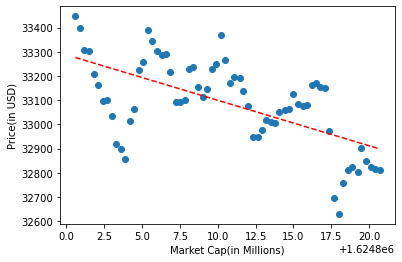

In [99]:
x = []
y = []
for a,b in prices:
    x.append(a/1000000)
    y.append(b)
plt.scatter(x, y)
plt.xlabel("Market Cap(in Millions)") # Traded 
plt.ylabel("Price(in USD)")
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

As you can see from the above graph, the trend line(red one) shows the price to decrese in comming time, which is in agreement with the sentiment score we obtained earlier.